In [10]:
import pandas as pd
import numpy as np

import seaborn as sns; sns.set()
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 9) # (w, h)

In [11]:
data_name='data_1'
df = pd.read_csv('data_1.csv')
df

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,clientId,sourceMedium,deviceCategory,region,userType,hour,sessionDuration,pageviews,goal1Completions,goal7Completions,goal14Completions,date
0,596290815.1577826800,(direct) / (none),desktop,(not set),New Visitor,0,67.0,8.0,0.0,0.0,0.0,2020-01-01
1,133470528.1577854676,(direct) / (none),desktop,(not set),New Visitor,7,4.0,2.0,0.0,0.0,0.0,2020-01-01
2,91882268.1577854679,(direct) / (none),desktop,(not set),New Visitor,7,5.0,2.0,0.0,0.0,0.0,2020-01-01
3,858851113.1577871896,(direct) / (none),desktop,(not set),New Visitor,12,83.0,3.0,0.0,0.0,0.0,2020-01-01
4,1014233087.1577892942,(direct) / (none),desktop,(not set),New Visitor,18,0.0,1.0,0.0,0.0,0.0,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
4963413,999414541.1593978935,setlcity.ru / referral,mobile,Saint Petersburg,Returning Visitor,23,21.0,3.0,0.0,0.0,0.0,2020-07-30
4963414,999423340.1596122868,yandex / cpc,mobile,Saint Petersburg,New Visitor,18,0.0,1.0,0.0,0.0,0.0,2020-07-30
4963415,999884453.1596097319,(direct) / (none),mobile,Saint Petersburg,New Visitor,11,934.0,37.0,0.0,0.0,0.0,2020-07-30
4963416,999884453.1596097319,yandex-GK / cpc,mobile,Saint Petersburg,Returning Visitor,13,0.0,1.0,0.0,0.0,0.0,2020-07-30


In [12]:
df.rename(columns={'goal1Completions': 'G1_view_contacts'
                    ,'goal7Completions': 'G7_mortgage_terms'
                      ,'goal14Completions': 'G14_recall'}, inplace=True)
df

,clientId,sourceMedium,deviceCategory,region,userType,hour,sessionDuration,pageviews,G1_view_contacts,G7_mortgage_terms,G14_recall,date
0,596290815.1577826800,(direct) / (none),desktop,(not set),New Visitor,0,67.0,8.0,0.0,0.0,0.0,2020-01-01
1,133470528.1577854676,(direct) / (none),desktop,(not set),New Visitor,7,4.0,2.0,0.0,0.0,0.0,2020-01-01
2,91882268.1577854679,(direct) / (none),desktop,(not set),New Visitor,7,5.0,2.0,0.0,0.0,0.0,2020-01-01
3,858851113.1577871896,(direct) / (none),desktop,(not set),New Visitor,12,83.0,3.0,0.0,0.0,0.0,2020-01-01
4,1014233087.1577892942,(direct) / (none),desktop,(not set),New Visitor,18,0.0,1.0,0.0,0.0,0.0,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
4963413,999414541.1593978935,setlcity.ru / referral,mobile,Saint Petersburg,Returning Visitor,23,21.0,3.0,0.0,0.0,0.0,2020-07-30
4963414,999423340.1596122868,yandex / cpc,mobile,Saint Petersburg,New Visitor,18,0.0,1.0,0.0,0.0,0.0,2020-07-30
4963415,999884453.1596097319,(direct) / (none),mobile,Saint Petersburg,New Visitor,11,934.0,37.0,0.0,0.0,0.0,2020-07-30
4963416,999884453.1596097319,yandex-GK / cpc,mobile,Saint Petersburg,Returning Visitor,13,0.0,1.0,0.0,0.0,0.0,2020-07-30


In [13]:
# Удалите сесии длительностью 15 секунд и меньше в которых пользователь совершил конверсии.
# Убрали ботов
df = df.drop(
                df.query('(G1_view_contacts!=0 | G7_mortgage_terms!=0 | G14_recall!=0) & (sessionDuration<=15)').index)
df

,clientId,sourceMedium,deviceCategory,region,userType,hour,sessionDuration,pageviews,G1_view_contacts,G7_mortgage_terms,G14_recall,date
0,596290815.1577826800,(direct) / (none),desktop,(not set),New Visitor,0,67.0,8.0,0.0,0.0,0.0,2020-01-01
1,133470528.1577854676,(direct) / (none),desktop,(not set),New Visitor,7,4.0,2.0,0.0,0.0,0.0,2020-01-01
2,91882268.1577854679,(direct) / (none),desktop,(not set),New Visitor,7,5.0,2.0,0.0,0.0,0.0,2020-01-01
3,858851113.1577871896,(direct) / (none),desktop,(not set),New Visitor,12,83.0,3.0,0.0,0.0,0.0,2020-01-01
4,1014233087.1577892942,(direct) / (none),desktop,(not set),New Visitor,18,0.0,1.0,0.0,0.0,0.0,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
4963413,999414541.1593978935,setlcity.ru / referral,mobile,Saint Petersburg,Returning Visitor,23,21.0,3.0,0.0,0.0,0.0,2020-07-30
4963414,999423340.1596122868,yandex / cpc,mobile,Saint Petersburg,New Visitor,18,0.0,1.0,0.0,0.0,0.0,2020-07-30
4963415,999884453.1596097319,(direct) / (none),mobile,Saint Petersburg,New Visitor,11,934.0,37.0,0.0,0.0,0.0,2020-07-30
4963416,999884453.1596097319,yandex-GK / cpc,mobile,Saint Petersburg,Returning Visitor,13,0.0,1.0,0.0,0.0,0.0,2020-07-30


Сколько пользователей и как долго сидят на сайте?

In [14]:
# Длительность сессий и кольичество посещений такого типа
df_Duration=df.groupby(['sessionDuration'],as_index=False).count()[['sessionDuration','clientId','G1_view_contacts','G7_mortgage_terms','G14_recall']].rename(columns={'clientId': 'count_clientId'})
df_Duration

,sessionDuration,count_clientId,G1_view_contacts,G7_mortgage_terms,G14_recall
0,0.0,1868579,1868579,1868579,1868579
1,1.0,89898,89898,89898,89898
2,2.0,79341,79341,79341,79341
3,3.0,114600,114600,114600,114600
4,4.0,137419,137419,137419,137419
...,...,...,...,...,...
7509,86163.0,1,1,1,1
7510,86179.0,1,1,1,1
7511,86202.0,1,1,1,1
7512,86221.0,1,1,1,1


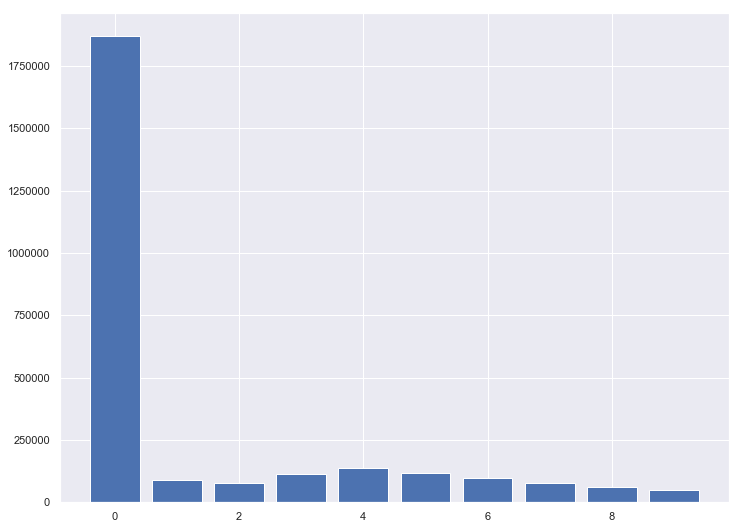

In [15]:
plt.bar(df_Duration['sessionDuration'].head(10).values, df_Duration['count_clientId'].head(10).values)
plt.show()

Уберем длительность сесии 0. Для того чтобы увидеть динамику

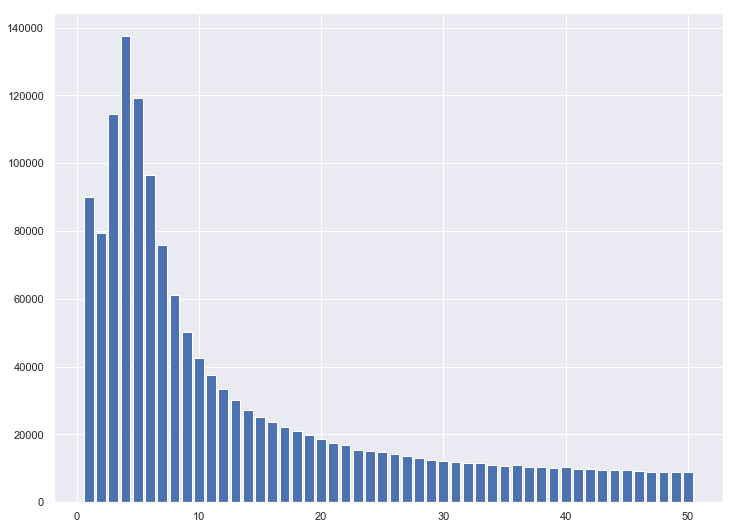

Длительность сессии с наибольшим колличеством пользователей  
    sessionDuration  count_clientId
4              4.0          137419


In [16]:
plt.bar(df_Duration['sessionDuration'].drop(0).head(50).values, df_Duration['count_clientId'].drop(0).head(50).values)
plt.show()
print(
 'Длительность сессии с наибольшим колличеством пользователей ', '\n',
    df_Duration[df_Duration['count_clientId']==df_Duration.drop(0)['count_clientId'].max()][['sessionDuration','count_clientId']])

Как взаимосвязано то как долго человек сидит на сайте с тем как делает конверсию?


Text(0.5, 1.0, 'G14')

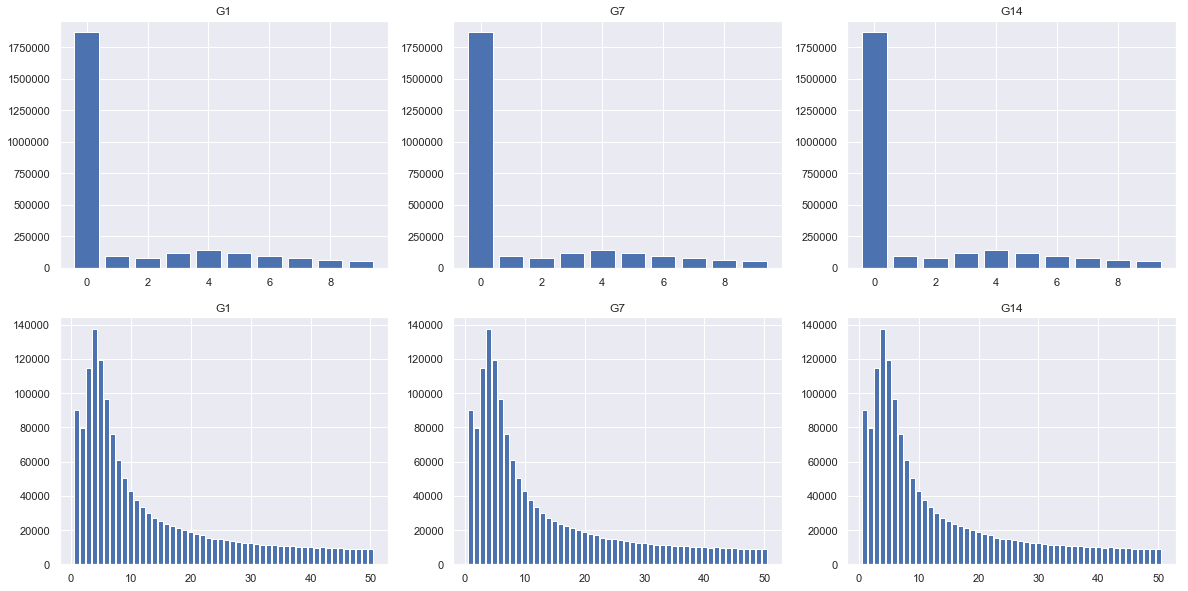

In [17]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20, 10))

axes[0][0].bar(df_Duration['sessionDuration'].head(10).values, df_Duration['G1_view_contacts'].head(10).values)
axes[0][0].set_title('G1')

axes[0][1].bar(df_Duration['sessionDuration'].head(10).values, df_Duration['G7_mortgage_terms'].head(10).values)
axes[0][1].set_title('G7')

axes[0][2].bar(df_Duration['sessionDuration'].head(10).values, df_Duration['G14_recall'].head(10).values)
axes[0][2].set_title('G14')

axes[1][0].bar(df_Duration['sessionDuration'].drop(0).head(50).values, df_Duration['G1_view_contacts'].drop(0).head(50).values)
axes[1][0].set_title('G1')

axes[1][1].bar(df_Duration['sessionDuration'].drop(0).head(50).values, df_Duration['G7_mortgage_terms'].drop(0).head(50).values)
axes[1][1].set_title('G7')

axes[1][2].bar(df_Duration['sessionDuration'].drop(0).head(50).values, df_Duration['G14_recall'].drop(0).head(50).values)
axes[1][2].set_title('G14')



# Определите частоту посещения сайта пользователями

Частота: раз в день, раз в неделю, раз в месяц, раз в три месяца, раз в пол года, раз в год?
    Что смотрим - интервал между заходами.
    Что нужно - для каждого id посчитать интервалы между заходдами, посчитать среднее интервалов.
    

In [18]:
# Определите частоту посещения сайта пользователями
df[['clientId']].nunique()

clientId    2242364
dtype: int64

In [19]:
# Число посещений сайта для каждого пользователя
df_Freq=df.groupby(['clientId'],as_index=False).count()[['clientId','date']].sort_values(by='date')

In [20]:
# Колличество посещений и сколько пользователей сделали такое кол-во посещений
df_Freq=df_Freq.groupby(['date'],as_index=False).agg({'clientId' : 'count'})
df_Freq.rename(columns={'clientId': 'count_clientId'
                    ,'date': 'quantity_of_date'}, inplace=True)
df_Freq

,quantity_of_date,count_clientId
0,1,1512628
1,2,357439
2,3,137814
3,4,69855
4,5,41507
...,...,...
409,918,1
410,975,1
411,1232,1
412,1266,1


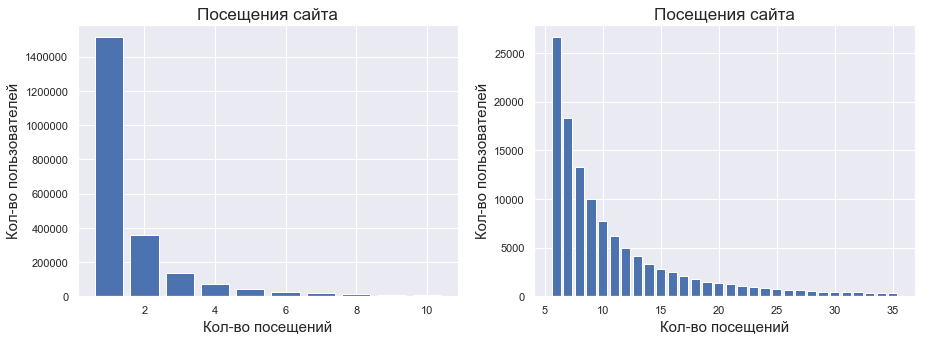

In [21]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

axes[0].bar(df_Freq['quantity_of_date'].head(10).values, df_Freq['count_clientId'].head(10).values)
axes[0].set_xlabel('Кол-во посещений',fontsize=15)
axes[0].set_ylabel('Кол-во пользователей',fontsize=15)
axes[0].set_title('Посещения сайта',fontsize=17)


axes[1].bar(df_Freq['quantity_of_date'].drop(range(5)).head(30).values, df_Freq['count_clientId'].drop(range(5)).head(30).values)
axes[1].set_xlabel('Кол-во посещений',fontsize=15)
axes[1].set_ylabel('Кол-во пользователей',fontsize=15)
axes[1].set_title('Посещения сайта',fontsize=17)

plt.show()
plt.style.use('seaborn');
fig.savefig('img_RW/частота посещений сайта.png',bbox_inches='tight')
# ,transparent=True

In [22]:
#Абсолютное большинство зашло один раз
df_Freq[df_Freq['count_clientId']==df_Freq['count_clientId'].max()]

,quantity_of_date,count_clientId
0,1,1512628


In [23]:
# Добавим в процентах процентах
df_Freq['percent']=df_Freq[['count_clientId']]*100/df_Freq[['count_clientId']].sum()
df_Freq

,quantity_of_date,count_clientId,percent
0,1,1512628,67.456845
1,2,357439,15.940276
2,3,137814,6.145925
3,4,69855,3.115239
4,5,41507,1.851038
...,...,...,...
409,918,1,0.000045
410,975,1,0.000045
411,1232,1,0.000045
412,1266,1,0.000045


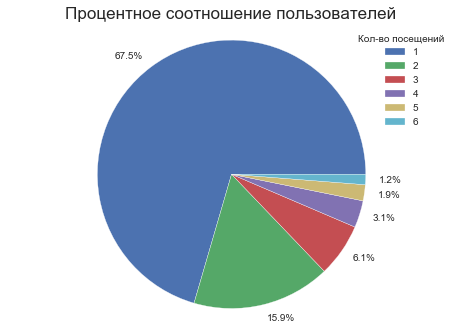

In [24]:
vals = df_Freq['percent'].head(6).values
labels = df_Freq['quantity_of_date'].head(6).values

set_percent=[]
for i in df_Freq['percent'].head(6).values:
    set_percent.append(str(round(i,1))+"%")
set_percent

fig, ax = plt.subplots()
ax.pie(vals, labels=set_percent)
ax.axis("equal")
ax.set_title('Процентное соотношение пользователей',fontsize=17)
plt.legend(labels,title ='Кол-во посещений')
fig.savefig('img_RW/частота посещений сайта в процентах.png',bbox_inches='tight')

In [25]:
# Рабочий вариант! Нормальная скорость.
# Для каждого пользователя определили кол-во входов и среднее колличество дней между этими входами
from datetime import datetime
import statistics 
from statistics import mean
def f(in_put):
    date_buf=in_put['date'].unique()
    if len(date_buf)!=1:
        buf=[]
        for i in range(len(date_buf)-1):
            buf.append(( datetime.strptime(date_buf[i+1],"%Y-%m-%d")-datetime.strptime(date_buf[i],"%Y-%m-%d")).days)
            return [len(date_buf),mean(buf)]
    return [1,0]
d_buf=df[['clientId','date']].groupby('clientId').apply(func=f)
frequency_of_enter=pd.DataFrame(d_buf,columns=['apl'])
frequency_of_enter=frequency_of_enter.reset_index()
frequency_of_enter[['count_of_enter_days','frequency']] = pd.DataFrame(frequency_of_enter.apl.values.tolist(), index= frequency_of_enter.index)
frequency_of_enter=frequency_of_enter.drop(columns=['apl'])
frequency_of_enter

,clientId,count_of_enter_days,frequency
0,14956.2,1,0
1,17226.2,1,0
2,32998.2,1,0
3,36356.2,1,0
4,38643.2,1,0
...,...,...,...
2242359,d0732877-2b78-4e5b-adeb-047eafe0fa74,1,0
2242360,d6431f51-556b-47cf-a3a0-a96a73956648,3,31
2242361,e2269794-384a-4328-9113-d02061ce9e5f,1,0
2242362,e63e9aed-cb59-4dcb-9570-64a396e2915a,1,0


In [26]:
# Пользователи заходившие еще раз в другой день как минимум один раз
frequency_of_enter_not_null=frequency_of_enter[frequency_of_enter['frequency']!=0]
frequency_of_enter_not_null

,clientId,count_of_enter_days,frequency
8,50174.2,2,1
10,128780,4,1
13,150862,2,1
34,435075,2,22
41,518011,3,3
...,...,...,...
2242346,999995252.1580048150,2,7
2242353,aafc9e3a-51b2-4fd5-8c55-a3d218c2bc9a,2,2
2242354,af46d6e8-c948-4588-859b-c3518d4f2f08,2,44
2242356,bbe7fe82-4d96-43fc-8665-68456a611a14,3,2


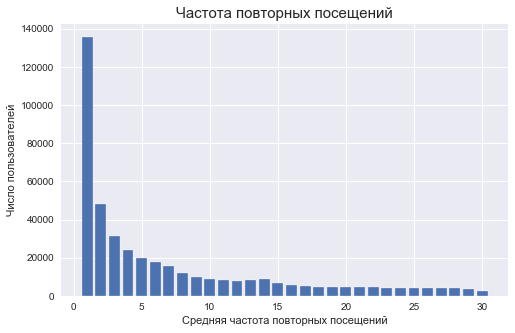

In [27]:
bar_df=frequency_of_enter_not_null.groupby(['frequency'],as_index=False).agg({'clientId' : 'count'})

fig, ax = plt.subplots(figsize=(8,5)) 
plt.bar(bar_df['frequency'].head(30).values, bar_df['clientId'].head(30).values)
ax.set_title('Частота повторных посещений', fontsize=15)
ax.set_xlabel('Средняя частота повторных посещений')
ax.set_ylabel('Число пользователей')

plt.show()
fig.savefig('img_RW/частота повторных посещений сайта.png',bbox_inches='tight')

In [28]:
# Максимальный средний интервал между входами
bar_df.max()

frequency       211
clientId     135720
dtype: int64

# Какие пользователи чаще совершают конверсию, новые или вернувшиеся?

In [29]:
conv=df.groupby(['userType'],as_index=False).agg({'G1_view_contacts' : 'sum',
                                            'G7_mortgage_terms' : 'sum',
                                            'G14_recall' : 'sum'})

conv

,userType,G1_view_contacts,G7_mortgage_terms,G14_recall
0,New Visitor,13976.0,17050.0,6557.0
1,Returning Visitor,21565.0,26578.0,10321.0


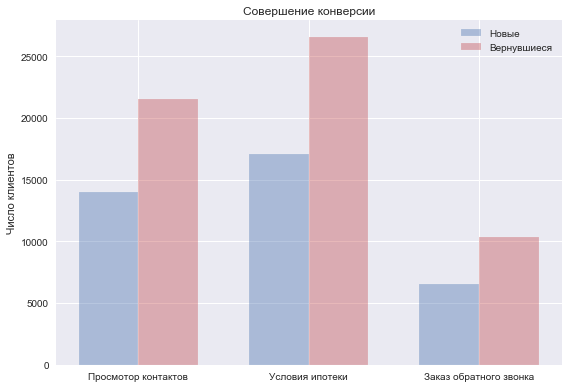

In [30]:
import numpy as np
import matplotlib.pyplot as plt


n_groups = 3

new_visitors = conv.loc[conv['userType'] == 'New Visitor',['G1_view_contacts','G7_mortgage_terms','G14_recall']].to_numpy()[0]
returning_visitors =conv.loc[conv['userType'] == 'Returning Visitor',['G1_view_contacts','G7_mortgage_terms','G14_recall']].to_numpy()[0]

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, new_visitors, bar_width,
                 alpha=opacity,
                 color='b',
                 error_kw=error_config,
                 label='Новые')

rects2 = plt.bar(index + bar_width, returning_visitors, bar_width,
                 alpha=opacity,
                 color='r',
                 error_kw=error_config,
                 label='Вернувшиеся')

plt.xlabel('')
plt.ylabel('Число клиентов')
plt.title('Совершение конверсии')
plt.xticks(index + bar_width / 2, ('Просмотор контактов',
                                   'Условия ипотеки',
                                   'Заказ обратного звонка'))
plt.legend()

plt.tight_layout()
fig.savefig('img_RW/совершение конверсии новые вернувшиеся.png',bbox_inches='tight')
plt.show()

# Как различаются показатели вовлечённости на разных устройствах?

какие есть устройства?
что есть вовлеченнность?
— это желание посетителя сайта оставаться на сайте и взаимодействовать с ним

Показатели

    Среднее время, проведенное на сайте
    Глубина просмотра, или количество просмотренных страниц. 
    Процент новых посетителей
    Процент вернувшихся посетителей.
    Отказы (ушли менее чем через 15 сек)
    

In [31]:
type_device=df.deviceCategory.unique()
type_device

array(['desktop', 'mobile', 'tablet'], dtype=object)

In [32]:
df

,clientId,sourceMedium,deviceCategory,region,userType,hour,sessionDuration,pageviews,G1_view_contacts,G7_mortgage_terms,G14_recall,date
0,596290815.1577826800,(direct) / (none),desktop,(not set),New Visitor,0,67.0,8.0,0.0,0.0,0.0,2020-01-01
1,133470528.1577854676,(direct) / (none),desktop,(not set),New Visitor,7,4.0,2.0,0.0,0.0,0.0,2020-01-01
2,91882268.1577854679,(direct) / (none),desktop,(not set),New Visitor,7,5.0,2.0,0.0,0.0,0.0,2020-01-01
3,858851113.1577871896,(direct) / (none),desktop,(not set),New Visitor,12,83.0,3.0,0.0,0.0,0.0,2020-01-01
4,1014233087.1577892942,(direct) / (none),desktop,(not set),New Visitor,18,0.0,1.0,0.0,0.0,0.0,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
4963413,999414541.1593978935,setlcity.ru / referral,mobile,Saint Petersburg,Returning Visitor,23,21.0,3.0,0.0,0.0,0.0,2020-07-30
4963414,999423340.1596122868,yandex / cpc,mobile,Saint Petersburg,New Visitor,18,0.0,1.0,0.0,0.0,0.0,2020-07-30
4963415,999884453.1596097319,(direct) / (none),mobile,Saint Petersburg,New Visitor,11,934.0,37.0,0.0,0.0,0.0,2020-07-30
4963416,999884453.1596097319,yandex-GK / cpc,mobile,Saint Petersburg,Returning Visitor,13,0.0,1.0,0.0,0.0,0.0,2020-07-30


In [33]:
# Первая чпсть информации
involvement=df.groupby(['deviceCategory'],as_index=False).agg({'pageviews' : 'mean',
                                            'sessionDuration' : 'mean'})

involvement

,deviceCategory,pageviews,sessionDuration
0,desktop,4.583831,210.940197
1,mobile,3.311531,142.520448
2,tablet,3.831645,173.975937


In [34]:
# Поиск еще инф о вовлеченности
from datetime import datetime
import statistics 
from statistics import mean

def f_involv(in_put):
    return [in_put[in_put['userType']=='New Visitor']['userType'].count(),
            in_put[in_put['userType']=='Returning Visitor']['userType'].count()]
    

buf=df[['deviceCategory','userType']].groupby('deviceCategory').apply(func=f_involv)
df_buf=pd.DataFrame(buf,columns=['apl'])
df_buf=df_buf.reset_index()
df_buf[['New_Visitor','Returning_Visitor']] = pd.DataFrame(df_buf.apl.values.tolist(), index= df_buf.index)
df_buf=df_buf.drop(columns=['apl'])

# В проценты
s=df_buf.New_Visitor.sum()
for i in df.deviceCategory.unique():
    df_buf.loc[df_buf['deviceCategory'] == i,'New_Visitor']=(df_buf.loc[df_buf['deviceCategory'] == i].New_Visitor/s*100).values[0]
s=df_buf.Returning_Visitor.sum()
for i in df.deviceCategory.unique():
    df_buf.loc[df_buf['deviceCategory'] == i,'Returning_Visitor']=(df_buf.loc[df_buf['deviceCategory'] == i].Returning_Visitor/s*100).values[0]
# Добавляем к осн части
involvement_indicators=involvement.merge(df_buf, on='deviceCategory')

# Добавим отказы
involvement_indicators[['refusal']]=df.query('sessionDuration<=15').groupby('deviceCategory',as_index=False).agg({'clientId' : 'count'})[['clientId']]
# В проценты
s=involvement_indicators.refusal.sum()
for i in df.deviceCategory.unique():
    involvement_indicators.loc[involvement_indicators['deviceCategory'] == i,'refusal']=(involvement_indicators.loc[involvement_indicators['deviceCategory'] == i].refusal/s*100).values[0]
involvement_indicators

,deviceCategory,pageviews,sessionDuration,New_Visitor,Returning_Visitor,refusal
0,desktop,4.583831,210.940197,40.062643,43.508655,38.926439
1,mobile,3.311531,142.520448,56.053932,51.873120,56.655823
2,tablet,3.831645,173.975937,3.883425,4.618225,4.417738


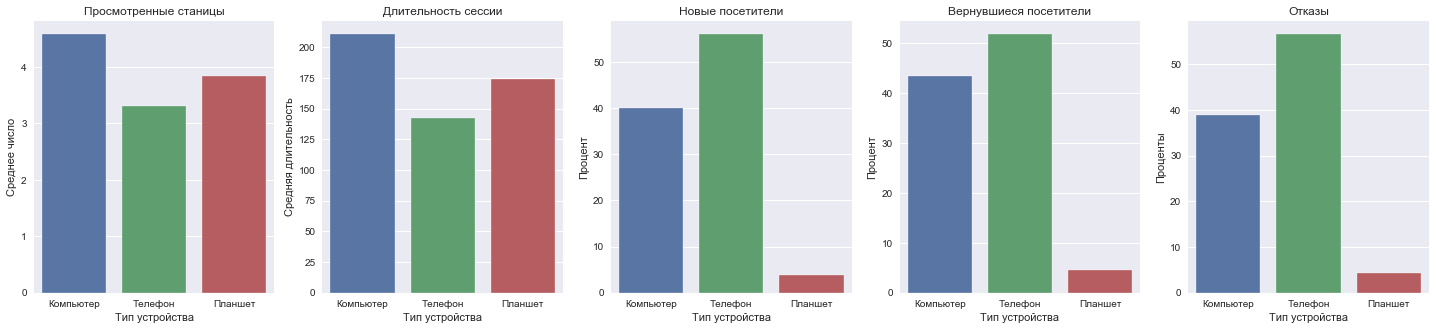

In [35]:
involvement_indicators.deviceCategory=['Компьютер','Телефон','Планшет']

fig, axes = plt.subplots(nrows = 1, ncols = 5, figsize = (25, 5))
locatin_bar=[1,2,3]
sns.barplot(x="deviceCategory", y="pageviews", data=involvement_indicators,ax=axes[0])
axes[0].set(xlabel='Тип устройства',ylabel='Среднее число',title='Просмотренные станицы')

sns.barplot(x="deviceCategory", y="sessionDuration", data=involvement_indicators,ax=axes[1])
axes[1].set(xlabel='Тип устройства',ylabel='Средняя длительность',title='Длительность сессии')

sns.barplot(x="deviceCategory", y="New_Visitor", data=involvement_indicators,ax=axes[2])
axes[2].set(xlabel='Тип устройства',ylabel='Процент',title='Новые посетители')

sns.barplot(x="deviceCategory", y="Returning_Visitor", data=involvement_indicators,ax=axes[3])
axes[3].set(xlabel='Тип устройства',ylabel='Процент',title='Вернувшиеся посетители')

sns.barplot(x="deviceCategory", y="refusal", data=involvement_indicators,ax=axes[4])
axes[4].set(xlabel='Тип устройства', ylabel='Проценты',title='Отказы')

fig.savefig('img_RW/показатели вовлеченности',bbox_inches='tight')
plt.show()

# Как различаются показатели вовлечённости на разных устройствах у пользоветей, которые совершили конверсии?

In [36]:
# Уникальное число конферсий
df_conv=df.query('G1_view_contacts!=0 | G7_mortgage_terms!=0 | G14_recall!=0')
print('G1_view_contacts: ',df_conv.G1_view_contacts.unique())
print('G7_mortgage_terms: ',df_conv.G7_mortgage_terms.unique())
print('G14_recall: ',df_conv.G14_recall.unique())

G1_view_contacts:  [0. 1. 2. 3. 4. 7. 5. 6.]
G7_mortgage_terms:  [1. 0. 2. 3. 5. 7. 8. 4. 6. 9.]
G14_recall:  [0. 1. 2. 3. 4.]


Отказов не будет, т.к. мы их удалили, менее 15 сек с конверсией - боты

In [37]:
# Выбрали пользователей с конверсией
df_conv=df.query('G1_view_contacts!=0 | G7_mortgage_terms!=0 | G14_recall!=0')

# Повторяем действия 
involvement_conv=df_conv.groupby(['deviceCategory'],as_index=False).agg({'pageviews' : 'mean',
                                            'sessionDuration' : 'mean'})

involvement_conv


# Поиск еще инф о вовлеченности
from datetime import datetime
import statistics 
from statistics import mean

def f_involv(in_put):
    return [in_put[in_put['userType']=='New Visitor']['userType'].count(),
            in_put[in_put['userType']=='Returning Visitor']['userType'].count()]
    

buf=df_conv[['deviceCategory','userType']].groupby('deviceCategory').apply(func=f_involv)
df_buf=pd.DataFrame(buf,columns=['apl'])
df_buf=df_buf.reset_index()
df_buf[['New_Visitor','Returning_Visitor']] = pd.DataFrame(df_buf.apl.values.tolist(), index= df_buf.index)
df_buf=df_buf.drop(columns=['apl'])

# В проценты
s=df_buf.New_Visitor.sum()
for i in df.deviceCategory.unique():
    df_buf.loc[df_buf['deviceCategory'] == i,'New_Visitor']=(df_buf.loc[df_buf['deviceCategory'] == i].New_Visitor/s*100).values[0]
s=df_buf.Returning_Visitor.sum()
for i in df.deviceCategory.unique():
    df_buf.loc[df_buf['deviceCategory'] == i,'Returning_Visitor']=(df_buf.loc[df_buf['deviceCategory'] == i].Returning_Visitor/s*100).values[0]
# Добавляем к осн части
involvement_indicators_conv=involvement_conv.merge(df_buf, on='deviceCategory')

involvement_indicators_conv

,deviceCategory,pageviews,sessionDuration,New_Visitor,Returning_Visitor
0,desktop,11.298828,586.613078,49.583345,54.263524
1,mobile,9.170406,521.144024,47.394880,41.637179
2,tablet,12.223180,783.731947,3.021775,4.099298


In [38]:
involvement_indicators_conv

,deviceCategory,pageviews,sessionDuration,New_Visitor,Returning_Visitor
0,desktop,11.298828,586.613078,49.583345,54.263524
1,mobile,9.170406,521.144024,47.394880,41.637179
2,tablet,12.223180,783.731947,3.021775,4.099298


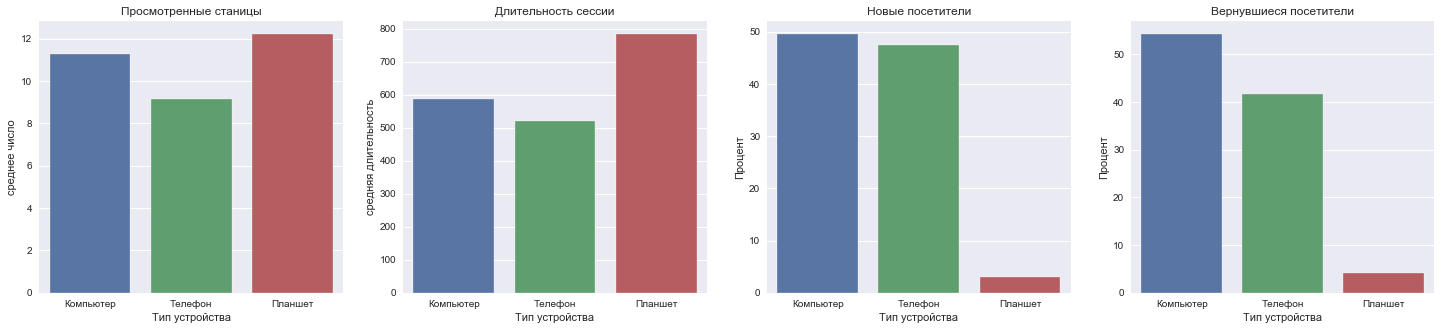

In [39]:
involvement_indicators_conv.deviceCategory=['Компьютер','Телефон','Планшет']

fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (25, 5))
locatin_bar=[1,2,3]
sns.barplot(x="deviceCategory", y="pageviews", data=involvement_indicators_conv,ax=axes[0])
axes[0].set(xlabel='Тип устройства',ylabel='среднее число',title='Просмотренные станицы')

sns.barplot(x="deviceCategory", y="sessionDuration", data=involvement_indicators_conv,ax=axes[1])
axes[1].set(xlabel='Тип устройства',ylabel='средняя длительность',title='Длительность сессии')

sns.barplot(x="deviceCategory", y="New_Visitor", data=involvement_indicators_conv,ax=axes[2])
axes[2].set(xlabel='Тип устройства',ylabel='Процент',title='Новые посетители')

sns.barplot(x="deviceCategory", y="Returning_Visitor", data=involvement_indicators_conv,ax=axes[3])
axes[3].set(xlabel='Тип устройства',ylabel='Процент',title='Вернувшиеся посетители')

fig.savefig('img_RW/показатели вовлеченности вернувшиеся',bbox_inches='tight')
plt.show()

# Как повлияло взаимодействие с разделами Контакты и Иппотека на совершение лида на различных устройствах?

In [40]:
# Выбрали пользователей с лидом
df_lid=df.query('G14_recall!=0')
df_lid

,clientId,sourceMedium,deviceCategory,region,userType,hour,sessionDuration,pageviews,G1_view_contacts,G7_mortgage_terms,G14_recall,date
611,2065228025.1577908853,away.vk.com / referral,desktop,Krasnodar Krai,Returning Visitor,23,140.0,2.0,0.0,0.0,1.0,2020-01-01
1743,1968179843.1577777864,mirkvartir.ru / tgb,desktop,Vologda Oblast,Returning Visitor,14,497.0,16.0,0.0,0.0,1.0,2020-01-01
2124,1898242597.1566757398,setlcity.ru / referral,tablet,Murmansk Oblast,Returning Visitor,14,1604.0,4.0,0.0,0.0,1.0,2020-01-01
2816,326220639.1521891696,yandex.ru / referral,desktop,Saint Petersburg,Returning Visitor,16,129.0,4.0,0.0,0.0,1.0,2020-01-01
3394,115046077.1565515515,yandex / organic,mobile,Nizhny Novgorod Oblast,Returning Visitor,9,149.0,3.0,0.0,0.0,1.0,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
4961747,816106393.1596116994,yandex-GK / cpc,mobile,Saint Petersburg,New Visitor,16,186.0,8.0,0.0,0.0,1.0,2020-07-30
4962752,925998707.1596119756,google / organic,mobile,Saint Petersburg,New Visitor,17,1327.0,6.0,0.0,0.0,1.0,2020-07-30
4963303,987175456.1571167394,google / organic,mobile,Moscow,Returning Visitor,14,309.0,8.0,0.0,0.0,1.0,2020-07-30
4963359,994022636.1595340087,away.vk.com / referral,mobile,Leningrad Oblast,Returning Visitor,8,472.0,6.0,0.0,0.0,1.0,2020-07-30


In [41]:
# Уникальное число конферсий
print('G1_view_contacts: ',df_lid.G1_view_contacts.unique())
print('G7_mortgage_terms: ',df_lid.G7_mortgage_terms.unique())
print('G14_recall: ',df_lid.G14_recall.unique())

G1_view_contacts:  [0. 1. 2. 3.]
G7_mortgage_terms:  [0. 1. 2.]
G14_recall:  [1. 2. 3. 4.]


In [42]:
df_lid.groupby(['deviceCategory'],as_index=False).agg({'G1_view_contacts' : 'mean',
                                            'G7_mortgage_terms' : 'mean'})

,deviceCategory,G1_view_contacts,G7_mortgage_terms
0,desktop,0.041987,0.034570
1,mobile,0.034167,0.032227
2,tablet,0.037594,0.025063


In [43]:
def f_lid(in_put):
    f1_df=in_put.groupby('G1_view_contacts',as_index=False).agg({'clientId' : 'count'}).rename(columns={'clientId': 'counts'})
    f2_df=in_put.groupby('G7_mortgage_terms',as_index=False).agg({'clientId' : 'count'}).rename(columns={'clientId': 'counts'})
    f_df=f1_df.merge(f2_df, left_on='G1_view_contacts',
                     right_on='G7_mortgage_terms',
                     how='outer',
                     suffixes=('_G1', '_G7'))
    return f_df

buf=df_lid[['clientId','deviceCategory','G1_view_contacts','G7_mortgage_terms']].groupby('deviceCategory').apply(func=f_lid)
df_lid_reason=buf
df_lid_reason

G1_view_contacts  counts_G1  G7_mortgage_terms  counts_G7
deviceCategory                                                             
desktop        0               0.0     6866.0                0.0     6899.0
               1               1.0      260.0                1.0      245.0
               2               2.0       17.0                2.0        1.0
               3               3.0        2.0                NaN        NaN
mobile         0               0.0     8961.0                0.0     8983.0
               1               1.0      317.0                1.0      291.0
               2               NaN        NaN                2.0        4.0
tablet         0               0.0      384.0                0.0      389.0
               1               1.0       15.0                1.0       10.0

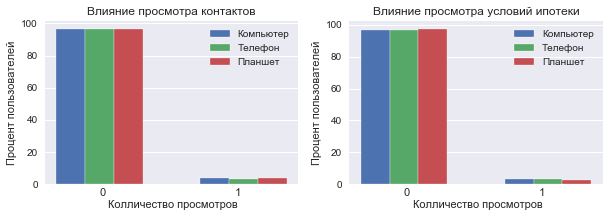

In [44]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def percent(in_put):
    sum_=in_put.sum()
    buf=[]
    for i in in_put:
        buf.append(i/sum_*100)
    return buf

loc=[1,2]

x1 =loc-np.full(2,0.2)
x2=loc
x3=loc+np.full(2,0.2)

y1_G1=percent(df_lid_reason.loc['desktop']['counts_G1'][0:2])
y2_G1=percent(df_lid_reason.loc['mobile']['counts_G1'][0:2])
y3_G1=percent(df_lid_reason.loc['tablet']['counts_G1'][0:2])

y1_G7=percent(df_lid_reason.loc['desktop']['counts_G7'][0:2])
y2_G7=percent(df_lid_reason.loc['mobile']['counts_G7'][0:2])
y3_G7=percent(df_lid_reason.loc['tablet']['counts_G7'][0:2])

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 3))

ax[0].bar(x1, y1_G1, width = 0.2,label = "Компьютер")
ax[0].bar(x2, y2_G1, width = 0.2,label = "Телефон")
ax[0].bar(x3, y3_G1, width = 0.2,label = "Планшет")
ax[0].get_xaxis().set_ticks([])
ax[0].set(xlabel='0                                           1 \n Колличество проcмотров',
          ylabel='Процент пользователей',
          title='Влияние просмотра контактов')
ax[0].legend()

ax[1].bar(x1, y1_G7, width = 0.2,label = "Компьютер")
ax[1].bar(x2, y2_G7, width = 0.2,label = "Телефон")
ax[1].bar(x3, y3_G7, width = 0.2,label = "Планшет")
ax[1].get_xaxis().set_ticks([])
ax[1].set(xlabel='0                                           1 \n Колличество проcмотров',
          ylabel='Процент пользователей',
          title='Влияние просмотра условий ипотеки')
ax[1].legend()

fig.savefig('img_RW/взаимодействие и совершение лида',bbox_inches='tight')
plt.show()

# ДОПОЛНИТЕЛЬНО. Исследование не вернувшихся

In [45]:
frequency_of_enter

,clientId,count_of_enter_days,frequency
0,14956.2,1,0
1,17226.2,1,0
2,32998.2,1,0
3,36356.2,1,0
4,38643.2,1,0
...,...,...,...
2242359,d0732877-2b78-4e5b-adeb-047eafe0fa74,1,0
2242360,d6431f51-556b-47cf-a3a0-a96a73956648,3,31
2242361,e2269794-384a-4328-9113-d02061ce9e5f,1,0
2242362,e63e9aed-cb59-4dcb-9570-64a396e2915a,1,0


In [46]:
# Поиск id не вернувшихся пользователей
id_gone_forever = frequency_of_enter.drop(frequency_of_enter[frequency_of_enter['count_of_enter_days']>1].index)
id_gone_forever=id_gone_forever.drop(columns=['count_of_enter_days','frequency'])
id_gone_forever

,clientId
0,14956.2
1,17226.2
2,32998.2
3,36356.2
4,38643.2
...,...
2242358,c596372d-1889-47f3-a47c-65b3b8aa3122
2242359,d0732877-2b78-4e5b-adeb-047eafe0fa74
2242361,e2269794-384a-4328-9113-d02061ce9e5f
2242362,e63e9aed-cb59-4dcb-9570-64a396e2915a


In [47]:
# Определение информации о не вернувшихся пользователях
doing_gone_forever=id_gone_forever.merge(df,left_on='clientId',right_on='clientId',how='inner')
doing_gone_forever

,clientId,sourceMedium,deviceCategory,region,userType,hour,sessionDuration,pageviews,G1_view_contacts,G7_mortgage_terms,G14_recall,date
0,14956.2,criteo / display,desktop,Saint Petersburg,New Visitor,1,3.0,2.0,0.0,0.0,0.0,2020-06-30
1,17226.2,yandex.ru / referral,desktop,Khanty-Mansi Autonomous Okrug,Returning Visitor,6,3.0,2.0,0.0,0.0,0.0,2020-06-03
2,17226.2,yandex.ru / referral,desktop,Khanty-Mansi Autonomous Okrug,Returning Visitor,13,2.0,2.0,0.0,0.0,0.0,2020-06-03
3,32998.2,setlcity.ru / referral,desktop,Saint Petersburg,Returning Visitor,23,337.0,8.0,0.0,0.0,0.0,2020-06-04
4,36356.2,novostroy.su / sp,desktop,Saint Petersburg,New Visitor,15,2.0,2.0,0.0,0.0,0.0,2020-06-29
...,...,...,...,...,...,...,...,...,...,...,...,...
2057936,f3398e4a-6e8c-4dad-b3b2-1bbedd04ae09,(direct) / (none),mobile,Moscow,New Visitor,3,2044.0,10.0,0.0,0.0,0.0,2020-01-02
2057937,f3398e4a-6e8c-4dad-b3b2-1bbedd04ae09,(direct) / (none),mobile,Moscow,New Visitor,4,0.0,1.0,0.0,0.0,0.0,2020-01-02
2057938,f3398e4a-6e8c-4dad-b3b2-1bbedd04ae09,(direct) / (none),mobile,Moscow,Returning Visitor,4,0.0,1.0,0.0,0.0,0.0,2020-01-02
2057939,f3398e4a-6e8c-4dad-b3b2-1bbedd04ae09,(direct) / (none),mobile,Moscow,Returning Visitor,5,0.0,1.0,0.0,0.0,0.0,2020-01-02


In [48]:
# Исследование конверсии  таких пользоватлей
conv_gone_forever=doing_gone_forever.groupby(['userType'],as_index=False).agg({'G1_view_contacts' : 'sum',
                                            'G7_mortgage_terms' : 'sum',
                                            'G14_recall' : 'sum',
                                            'clientId' : 'count',
                                           'sessionDuration' : 'mean'})
conv_gone_forever

,userType,G1_view_contacts,G7_mortgage_terms,G14_recall,clientId,sessionDuration
0,New Visitor,11003.0,12653.0,4254.0,1701864,103.540228
1,Returning Visitor,3026.0,4133.0,1416.0,356077,177.995984


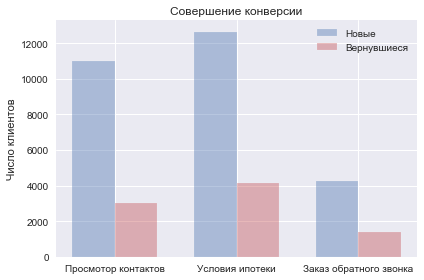

In [49]:
import numpy as np
import matplotlib.pyplot as plt


n_groups = 3

new_visitors = conv_gone_forever.loc[conv['userType'] == 'New Visitor',['G1_view_contacts','G7_mortgage_terms','G14_recall']].to_numpy()[0]
returning_visitors =conv_gone_forever.loc[conv['userType'] == 'Returning Visitor',['G1_view_contacts','G7_mortgage_terms','G14_recall']].to_numpy()[0]

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, new_visitors, bar_width,
                 alpha=opacity,
                 color='b',
                 error_kw=error_config,
                 label='Новые')

rects2 = plt.bar(index + bar_width, returning_visitors, bar_width,
                 alpha=opacity,
                 color='r',
                 error_kw=error_config,
                 label='Вернувшиеся')

plt.xlabel('')
plt.ylabel('Число клиентов')
plt.title('Совершение конверсии')
plt.xticks(index + bar_width / 2, ('Просмотор контактов',
                                   'Условия ипотеки',
                                   'Заказ обратного звонка'))
plt.legend()

plt.tight_layout()
# fig.savefig('img_RW/совершение конверсии новые вернувшиеся.png',bbox_inches='tight')
plt.show()

In [50]:
print('Не вернувшиеся пользователи. Процентное соотношение конверсии')
print('')
print('New Visitor')
print('')
print('G1_view_contacts',"%.2f" %(conv_gone_forever.loc[0,'G1_view_contacts']/conv_gone_forever.loc[0,'clientId']*100),'%')
print('G7_mortgage_terms',"%.2f" %(conv_gone_forever.loc[0,'G7_mortgage_terms']/conv_gone_forever.loc[0,'clientId']*100),'%')
print('G14_recall',"%.2f" %(conv_gone_forever.loc[0,'G14_recall']/conv_gone_forever.loc[0,'clientId']*100),'%')
print('')
print('Returning Visitor - Еща раз зашли в течении дня, но в другой уже не вернулись')
print('')
print('G1_view_contacts',"%.2f" %(conv_gone_forever.loc[1,'G1_view_contacts']/conv_gone_forever.loc[1,'clientId']*100),'%')
print('G7_mortgage_terms',"%.2f" %(conv_gone_forever.loc[1,'G7_mortgage_terms']/conv_gone_forever.loc[1,'clientId']*100),'%')
print('G14_recall',"%.2f" %(conv_gone_forever.loc[1,'G14_recall']/conv_gone_forever.loc[1,'clientId']*100),'%')

Не вернувшиеся пользователи. Процентное соотношение конверсии

New Visitor

G1_view_contacts 0.65 %
G7_mortgage_terms 0.74 %
G14_recall 0.25 %

Returning Visitor - Еща раз зашли в течении дня, но в другой уже не вернулись

G1_view_contacts 0.85 %
G7_mortgage_terms 1.16 %
G14_recall 0.40 %


In [51]:
# Определение устройств пользователей
doing_gone_forever.groupby(['deviceCategory'],as_index=False).agg({'clientId' : 'count'})

,deviceCategory,clientId
0,desktop,851946
1,mobile,1124862
2,tablet,81133


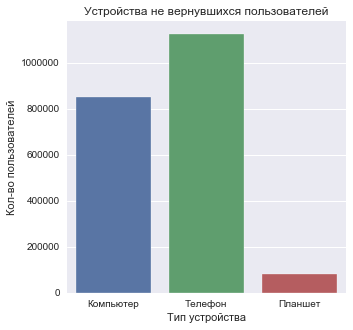

In [52]:
data_barplot=doing_gone_forever.groupby(['deviceCategory'],as_index=False).agg({'clientId' : 'count'})
data_barplot.deviceCategory=['Компьютер','Телефон','Планшет']
fig, axes = plt.subplots(figsize = (5,5))
locatin_bar=[1,2,3]
sns.barplot(x="deviceCategory", y="clientId", data=data_barplot,ax=axes)
axes.set(xlabel='Тип устройства',ylabel='Кол-во пользователей',title='Устройства не вернувшихся пользователей')
fig.savefig('img_RW/устройства не вернувшихся',bbox_inches='tight')


In [53]:
# Информация о клиентах совершивших отказ
print('Провели времени меньше 15сек. - ',"%.2f" % (doing_gone_forever[doing_gone_forever['sessionDuration']<=15]["clientId"].count()/doing_gone_forever["clientId"].count()*100),'%')
print('Не вернувшиеся пользователи, которые провели менее 15 сек. НЕ СОВЕРШИЛИ КОНВЕРСИЙ')
doing_gone_forever[doing_gone_forever['sessionDuration']<=15].groupby(['userType'],as_index=False).agg({'G1_view_contacts' : 'sum',
                                            'G7_mortgage_terms' : 'sum',
                                            'G14_recall' : 'sum',
                                            'clientId' : 'count',
                                           'sessionDuration' : 'mean'})

Провели времени меньше 15сек. -  63.68 %
Не вернувшиеся пользователи, которые провели менее 15 сек. НЕ СОВЕРШИЛИ КОНВЕРСИЙ


,userType,G1_view_contacts,G7_mortgage_terms,G14_recall,clientId,sessionDuration
0,New Visitor,0.0,0.0,0.0,1104738,2.237220
1,Returning Visitor,0.0,0.0,0.0,205698,1.736765


In [54]:
# Информация о клиентах НЕ совершивших отказ
print('Провели времени больше 15сек. - ',"%.2f" % (doing_gone_forever[doing_gone_forever['sessionDuration']>15]["clientId"].count()/doing_gone_forever["clientId"].count()*100),'%')
print('Не вернувшиеся пользователи, которые провели больше 15 сек. СОВЕРШИЛИ КОНВЕРСИИ')
doing_gone_forever_more15s=doing_gone_forever[doing_gone_forever['sessionDuration']>15].groupby(['userType'],as_index=False).agg({'G1_view_contacts' : 'sum',
                                            'G7_mortgage_terms' : 'sum',
                                            'G14_recall' : 'sum',
                                            'clientId' : 'count',
                                           'sessionDuration' : 'mean',
                                           'pageviews' : 'mean'})
print('Однако их процент все равно мал')
print('')
print('New Visitor')
print('G1_view_contacts',"%.2f" %(doing_gone_forever_more15s.loc[0,'G1_view_contacts']/doing_gone_forever_more15s.loc[0,'clientId']*100),'%')
print('G1_view_contacts',"%.2f" %(doing_gone_forever_more15s.loc[0,'G7_mortgage_terms']/doing_gone_forever_more15s.loc[0,'clientId']*100),'%')
print('G1_view_contacts',"%.2f" %(doing_gone_forever_more15s.loc[0,'G14_recall']/doing_gone_forever_more15s.loc[0,'clientId']*100),'%')
print('')
print('Returning Visitor')
print('G1_view_contacts',"%.2f" %(doing_gone_forever_more15s.loc[1,'G1_view_contacts']/doing_gone_forever_more15s.loc[1,'clientId']*100),'%')
print('G1_view_contacts',"%.2f" %(doing_gone_forever_more15s.loc[1,'G7_mortgage_terms']/doing_gone_forever_more15s.loc[1,'clientId']*100),'%')
print('G1_view_contacts',"%.2f" %(doing_gone_forever_more15s.loc[1,'G14_recall']/doing_gone_forever_more15s.loc[1,'clientId']*100),'%')

Провели времени больше 15сек. -  36.32 %
Не вернувшиеся пользователи, которые провели больше 15 сек. СОВЕРШИЛИ КОНВЕРСИИ
Однако их процент все равно мал

New Visitor
G1_view_contacts 1.84 %
G1_view_contacts 2.12 %
G1_view_contacts 0.71 %

Returning Visitor
G1_view_contacts 2.01 %
G1_view_contacts 2.75 %
G1_view_contacts 0.94 %
